# Indoor Localization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            precision_recall_fscore_support, precision_recall_curve, average_precision_score
from sklearn.metrics._plot.precision_recall_curve import plot_precision_recall_curve
import itertools
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import math  
from sklearn import svm
import pandas as pd

## data import & segmentation

In [2]:
df = pd.read_csv('data2.csv',index_col= False)
df = np.array(df)

In [3]:
X0 = df[:,[3,4,21,75]]                            # BLE only
X1 = np.delete(df, [0,1,2,3,4,21,72,73,74,75], 1) # WiFi only
X2 = df[:,[-4,-3,-2]]                             # Mag only
X3 = np.delete(df, [0,1,2,72,73,74], 1)           # BLE + WiFi
X4 = df[:,[3,4,21,-4,-3,-2,-1]]                   # BLE + Mag
X5 = np.delete(df, [0,1,2,3,4,21,75], 1)          # WiFi + Mag
X6 = np.delete(df, [0,1,2], 1)                    # BLE + WiFi + Mag

In [4]:
y = df[:,[0,1]]

In [5]:
y = [str(e)[1:-1] for e in y]

In [6]:
# Euclidean Distance
def distance(y_test, y_pred):
    # Calculate r-squared score
    error = 0;
    for i in range(0, len(y_pred)):
        tgp = [float(y_test[i].split()[0]),float(y_test[i].split()[1])]
        pgp = [float(y_pred[i].split()[0]),float(y_pred[i].split()[1])]
        error += math.sqrt((tgp[0]-pgp[0])**2 + (tgp[1]-pgp[1])**2) 
        print(error)
    return error

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def plotMat(Pred):
    cnf_matrix = confusion_matrix(y_test, Pred)
    plt.figure(figsize=(30, 30))
    plot_confusion_matrix(cnf_matrix, classes=target_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure(figsize=(30, 30))
    plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

In [9]:
def dis(x,y):
    return math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

In [10]:
def distAccPlot(y_test, Pred):
    cm = confusion_matrix(y_test, Pred)
    xs = [0.8,0.8 , 2.4, 2.4, 4.0, 4.0, 5.6, 5.6, 7.2, 7.2,  8.8,10.4, 8.8,10.4, 8.8,10.4, 8.8, 8.8,10.4,10.4,  7.2, 7.2, 5.6, 5.6, 4.0, 4.0, 2.4, 2.4, 0.8, 0.8];
    ys = [1.35,2.55,1.35,2.55,1.35,2.55,1.35,2.55,1.35,2.55, 1.35,1.35,2.55,2.55,3.70,3.70,5.90,4.80,4.80,5.90, 4.80,5.90,4.80,5.90,4.80,5.90,4.80,5.90,4.80,5.90];
    ds = []
    dic = {}
    for i,e in enumerate(cm):
        xx = xs[i]
        yy = ys[i]    
        d = []
        for j,p in enumerate(e):
            dist = dis([xx,yy],[xs[j],ys[j]])
            d += [dist]
            if dist in dic:
                dic[str(dist)] += 1
            else:
                dic[str(dist)] = 1        
        ds += [d]
    dic={}
    for i in range(len(cm)):
        for j in range(len(cm[0])):

            if ds[i][j] in dic:
                dic[ds[i][j]] += cm[i][j]/cm.sum()
            else:
                dic[ds[i][j]] = cm[i][j]/cm.sum() 
    lists = sorted(dic.items())
    x, y = zip(*lists)
    ay = [y[0]]
    for i in range(1,len(y)):
        ay += [y[i] + ay[i-1]]
    return x,ay

## BLE only

In [268]:
X = X0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [269]:
clf1 = SVC(kernel='rbf', gamma='scale', probability=True)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = DecisionTreeClassifier(max_depth=30)
clf4 = RandomForestClassifier(n_estimators=69, max_depth=None, min_samples_split=2, random_state=0)

In [270]:
clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
clf4 = clf4.fit(X_train,y_train)

In [271]:
Pred1 = clf1.predict(X_test)
Pred2 = clf2.predict(X_test)
Pred3 = clf3.predict(X_test)
Pred4 = clf4.predict(X_test)

In [272]:
target_names=[str(x) for x in range(1,31)]

In [273]:
accs = []
accs.append([accuracy_score(y_test, Pred1),
             accuracy_score(y_test, Pred2),
             accuracy_score(y_test, Pred3),
             accuracy_score(y_test, Pred4)])

In [274]:
scrs = []
scrs.append([precision_recall_fscore_support(y_test, Pred1, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred2, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred3, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred4, average='weighted')[:-1]])

/home/abucompeng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


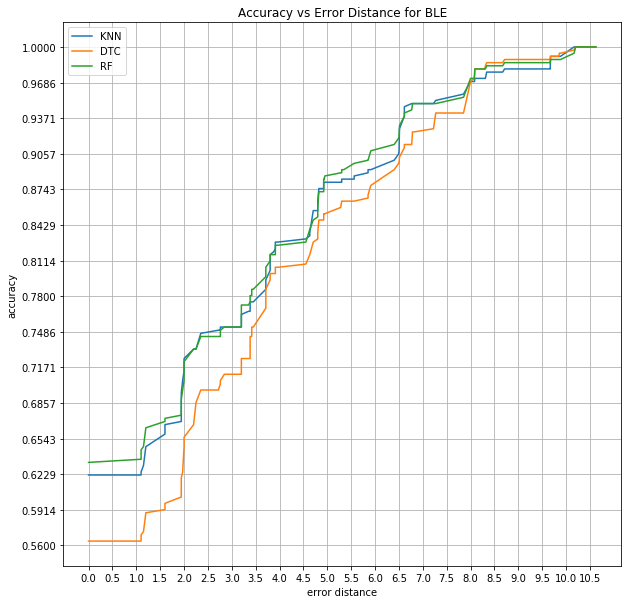

In [275]:
fig= plt.figure(figsize=(10,10))
x=[[],[],[]]
ay=[[],[],[]]
x[0],ay[0] = distAccPlot(y_test, Pred2)    
plt.plot(x[0], ay[0],label = 'KNN')
x[1],ay[1] = distAccPlot(y_test, Pred3)    
plt.plot(x[1], ay[1],label = 'DTC')
x[2],ay[2] = distAccPlot(y_test, Pred4)    
plt.plot(x[2], ay[2],label = 'RF')
#x[3],ay[3] = distAccPlot(y_test, Pred4)    
#plt.plot(x[3], ay[3],label = 'RF')
plt.xticks(np.arange(0,x[0][-1],0.5))
plt.yticks(np.linspace(min(ay)[0]-min(ay)[0]%0.01,1,num=15,endpoint=True))
plt.xlabel('error distance')
plt.ylabel('accuracy')
plt.title('Accuracy vs Error Distance for BLE')
plt.grid()
plt.legend()
plt.show()

## WiFi only

In [276]:
X = X1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [277]:
clf1 = SVC(kernel='rbf', gamma='scale', probability=True)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = DecisionTreeClassifier(max_depth=30)
clf4 = RandomForestClassifier(n_estimators=69, max_depth=None, min_samples_split=2, random_state=0)

In [278]:
clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
clf4 = clf4.fit(X_train,y_train)

In [279]:
Pred1 = clf1.predict(X_test)
Pred2 = clf2.predict(X_test)
Pred3 = clf3.predict(X_test)
Pred4 = clf4.predict(X_test)

In [280]:
target_names=[str(x) for x in range(1,31)]

In [281]:
accs.append([accuracy_score(y_test, Pred1),
             accuracy_score(y_test, Pred2),
             accuracy_score(y_test, Pred3),
             accuracy_score(y_test, Pred4)])

In [282]:
scrs.append([precision_recall_fscore_support(y_test, Pred1, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred2, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred3, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred4, average='weighted')[:-1]])

/home/abucompeng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


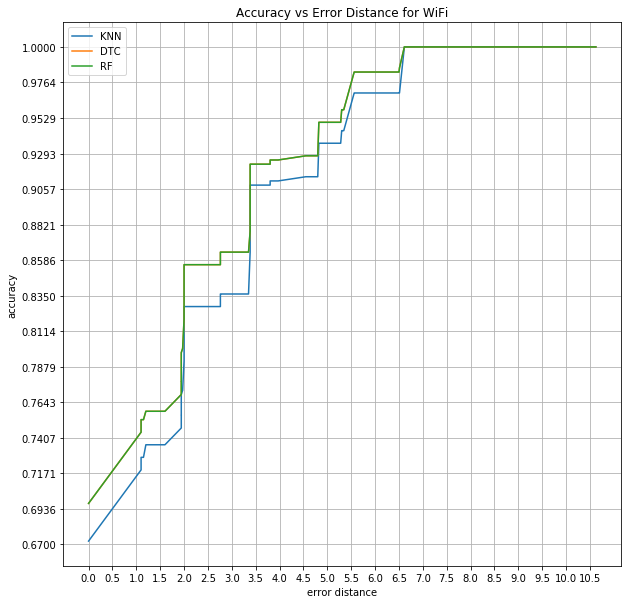

In [283]:
fig= plt.figure(figsize=(10,10))
x=[[],[],[]]
ay=[[],[],[]]
x[0],ay[0] = distAccPlot(y_test, Pred2)    
plt.plot(x[0], ay[0],label = 'KNN')
x[1],ay[1] = distAccPlot(y_test, Pred3)    
plt.plot(x[1], ay[1],label = 'DTC')
x[2],ay[2] = distAccPlot(y_test, Pred4)    
plt.plot(x[2], ay[2],label = 'RF')
#x[3],ay[3] = distAccPlot(y_test, Pred4)    
#plt.plot(x[3], ay[3],label = 'RF')
plt.xticks(np.arange(0,x[0][-1],0.5))
plt.yticks(np.linspace(min(ay)[0]-min(ay)[0]%0.01,1,num=15,endpoint=True))
plt.xlabel('error distance')
plt.ylabel('accuracy')
plt.title('Accuracy vs Error Distance for WiFi')
plt.grid()
plt.legend()
plt.show()

## Mag only

In [284]:
X = X2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [285]:
clf1 = SVC(kernel='rbf', gamma='scale', probability=True)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = DecisionTreeClassifier(max_depth=30)
clf4 = RandomForestClassifier(n_estimators=69, max_depth=None, min_samples_split=2, random_state=0)

In [286]:
clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
clf4 = clf4.fit(X_train,y_train)

In [287]:
target_names=[str(x) for x in range(1,31)]

In [288]:
accs.append([accuracy_score(y_test, Pred1),
             accuracy_score(y_test, Pred2),
             accuracy_score(y_test, Pred3),
             accuracy_score(y_test, Pred4)])

In [289]:
scrs.append([precision_recall_fscore_support(y_test, Pred1, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred2, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred3, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred4, average='weighted')[:-1]])

/home/abucompeng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


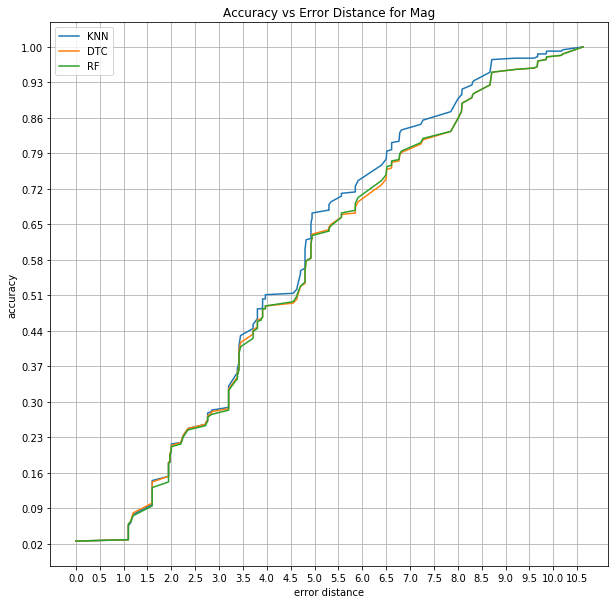

In [290]:
fig= plt.figure(figsize=(10,10))
x=[[],[],[]]
ay=[[],[],[]]
x[0],ay[0] = distAccPlot(y_test, Pred2)    
plt.plot(x[0], ay[0],label = 'KNN')
x[1],ay[1] = distAccPlot(y_test, Pred3)    
plt.plot(x[1], ay[1],label = 'DTC')
x[2],ay[2] = distAccPlot(y_test, Pred4)    
plt.plot(x[2], ay[2],label = 'RF')
#x[3],ay[3] = distAccPlot(y_test, Pred4)    
#plt.plot(x[3], ay[3],label = 'RF')
plt.xticks(np.arange(0,x[0][-1],0.5))
plt.yticks(np.linspace(min(ay)[0]-min(ay)[0]%0.01,1,num=15,endpoint=True))
plt.xlabel('error distance')
plt.ylabel('accuracy')
plt.title('Accuracy vs Error Distance for Mag')
plt.grid()
plt.legend()
plt.show()

## BLE + WiFi

In [291]:
X = X3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [292]:
clf1 = SVC(kernel='rbf', gamma='scale', probability=True)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = DecisionTreeClassifier(max_depth=30)
clf4 = RandomForestClassifier(n_estimators=69, max_depth=None, min_samples_split=2, random_state=0)

In [293]:
clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
clf4 = clf4.fit(X_train,y_train)

In [294]:
Pred1 = clf1.predict(X_test)
Pred2 = clf2.predict(X_test)
Pred3 = clf3.predict(X_test)
Pred4 = clf4.predict(X_test)

In [295]:
target_names=[str(x) for x in range(1,31)]

In [296]:
accs.append([accuracy_score(y_test, Pred1),
             accuracy_score(y_test, Pred2),
             accuracy_score(y_test, Pred3),
             accuracy_score(y_test, Pred4)])

In [297]:
scrs.append([precision_recall_fscore_support(y_test, Pred1, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred2, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred3, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred4, average='weighted')[:-1]])

/home/abucompeng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


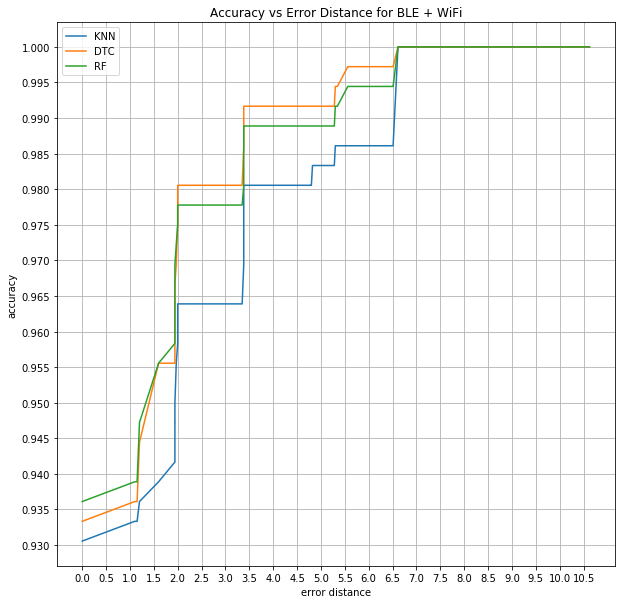

In [298]:
fig= plt.figure(figsize=(10,10))
x=[[],[],[]]
ay=[[],[],[]]
x[0],ay[0] = distAccPlot(y_test, Pred2)    
plt.plot(x[0], ay[0],label = 'KNN')
x[1],ay[1] = distAccPlot(y_test, Pred3)    
plt.plot(x[1], ay[1],label = 'DTC')
x[2],ay[2] = distAccPlot(y_test, Pred4)    
plt.plot(x[2], ay[2],label = 'RF')
#x[3],ay[3] = distAccPlot(y_test, Pred4)    
#plt.plot(x[3], ay[3],label = 'RF')
plt.xticks(np.arange(0,x[0][-1],0.5))
plt.yticks(np.linspace(min(ay)[0]-min(ay)[0]%0.01,1,num=15,endpoint=True))
plt.xlabel('error distance')
plt.ylabel('accuracy')
plt.title('Accuracy vs Error Distance for BLE + WiFi')
plt.grid()
plt.legend()
plt.show()

## BLE + Mag

In [299]:
X = X4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [300]:
clf1 = SVC(kernel='rbf', gamma='scale', probability=True)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = DecisionTreeClassifier(max_depth=30)
clf4 = RandomForestClassifier(n_estimators=69, max_depth=None, min_samples_split=2, random_state=0)

In [301]:
clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
clf4 = clf4.fit(X_train,y_train)

In [302]:
Pred1 = clf1.predict(X_test)
Pred2 = clf2.predict(X_test)
Pred3 = clf3.predict(X_test)
Pred4 = clf4.predict(X_test)

In [303]:
target_names=[str(x) for x in range(1,31)]

In [304]:
accs.append([accuracy_score(y_test, Pred1),
             accuracy_score(y_test, Pred2),
             accuracy_score(y_test, Pred3),
             accuracy_score(y_test, Pred4)])

In [305]:
scrs.append([precision_recall_fscore_support(y_test, Pred1, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred2, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred3, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred4, average='weighted')[:-1]])

/home/abucompeng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


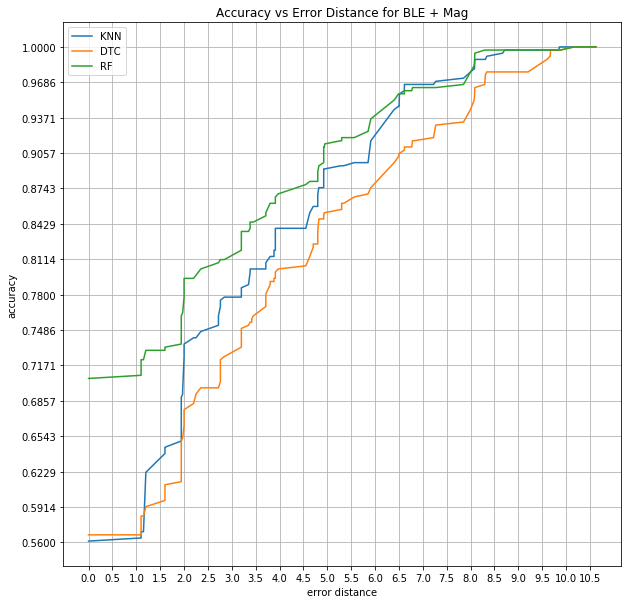

In [306]:
fig= plt.figure(figsize=(10,10))
x=[[],[],[]]
ay=[[],[],[]]
x[0],ay[0] = distAccPlot(y_test, Pred2)    
plt.plot(x[0], ay[0],label = 'KNN')
x[1],ay[1] = distAccPlot(y_test, Pred3)    
plt.plot(x[1], ay[1],label = 'DTC')
x[2],ay[2] = distAccPlot(y_test, Pred4)    
plt.plot(x[2], ay[2],label = 'RF')
#x[3],ay[3] = distAccPlot(y_test, Pred4)    
#plt.plot(x[3], ay[3],label = 'RF')
plt.xticks(np.arange(0,x[0][-1],0.5))
plt.yticks(np.linspace(min(ay)[0]-min(ay)[0]%0.01,1,num=15,endpoint=True))
plt.xlabel('error distance')
plt.ylabel('accuracy')
plt.title('Accuracy vs Error Distance for BLE + Mag')
plt.grid()
plt.legend()
plt.show()

## WiFi + Mag

In [307]:
X = X5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [308]:
clf1 = SVC(kernel='rbf', gamma='scale', probability=True)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = DecisionTreeClassifier(max_depth=30)
clf4 = RandomForestClassifier(n_estimators=69, max_depth=None, min_samples_split=2, random_state=0)

In [309]:
clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
clf4 = clf4.fit(X_train,y_train)

In [310]:
Pred1 = clf1.predict(X_test)
Pred2 = clf2.predict(X_test)
Pred3 = clf3.predict(X_test)
Pred4 = clf4.predict(X_test)

In [311]:
target_names=[str(x) for x in range(1,31)]

In [312]:
accs.append([accuracy_score(y_test, Pred1),
             accuracy_score(y_test, Pred2),
             accuracy_score(y_test, Pred3),
             accuracy_score(y_test, Pred4)])

In [313]:
scrs.append([precision_recall_fscore_support(y_test, Pred1, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred2, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred3, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred4, average='weighted')[:-1]])

/home/abucompeng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


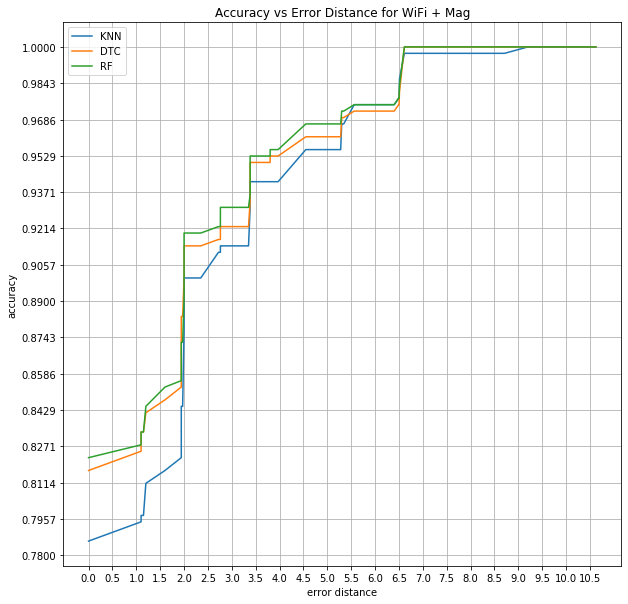

In [314]:
fig= plt.figure(figsize=(10,10))
x=[[],[],[]]
ay=[[],[],[]]
x[0],ay[0] = distAccPlot(y_test, Pred2)    
plt.plot(x[0], ay[0],label = 'KNN')
x[1],ay[1] = distAccPlot(y_test, Pred3)    
plt.plot(x[1], ay[1],label = 'DTC')
x[2],ay[2] = distAccPlot(y_test, Pred4)    
plt.plot(x[2], ay[2],label = 'RF')
#x[3],ay[3] = distAccPlot(y_test, Pred4)    
#plt.plot(x[3], ay[3],label = 'RF')
plt.xticks(np.arange(0,x[0][-1],0.5))
plt.yticks(np.linspace(min(ay)[0]-min(ay)[0]%0.01,1,num=15,endpoint=True))
plt.xlabel('error distance')
plt.ylabel('accuracy')
plt.title('Accuracy vs Error Distance for WiFi + Mag')
plt.grid()
plt.legend()
plt.show()

## BLE + WiFi + Mag

In [315]:
X = X6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [316]:
clf1 = SVC(kernel='rbf', gamma='scale', probability=True)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = DecisionTreeClassifier(max_depth=30)
clf4 = RandomForestClassifier(n_estimators=69, max_depth=None, min_samples_split=2, random_state=0)

In [317]:
clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
clf4 = clf4.fit(X_train,y_train)

In [318]:
Pred1 = clf1.predict(X_test)
Pred2 = clf2.predict(X_test)
Pred3 = clf3.predict(X_test)
Pred4 = clf4.predict(X_test)

In [319]:
target_names=[str(x) for x in range(1,31)]

In [320]:
accs.append([accuracy_score(y_test, Pred1),
             accuracy_score(y_test, Pred2),
             accuracy_score(y_test, Pred3),
             accuracy_score(y_test, Pred4)])

In [321]:
scrs.append([precision_recall_fscore_support(y_test, Pred1, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred2, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred3, average='weighted')[:-1],
             precision_recall_fscore_support(y_test, Pred4, average='weighted')[:-1]])

/home/abucompeng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [322]:
min(ay)

[0.7861111111111111,
 0.7944444444444444,
 0.7972222222222222,
 0.7972222222222222,
 0.811111111111111,
 0.8166666666666665,
 0.8166666666666665,
 0.8166666666666665,
 0.8166666666666665,
 0.8222222222222221,
 0.8333333333333331,
 0.8333333333333331,
 0.8333333333333331,
 0.8444444444444442,
 0.8444444444444442,
 0.8444444444444442,
 0.8777777777777775,
 0.8777777777777775,
 0.8999999999999998,
 0.8999999999999998,
 0.8999999999999998,
 0.8999999999999998,
 0.9111111111111109,
 0.9111111111111109,
 0.9111111111111109,
 0.9138888888888886,
 0.9138888888888886,
 0.9138888888888886,
 0.9138888888888886,
 0.9138888888888886,
 0.9138888888888886,
 0.9138888888888886,
 0.9138888888888886,
 0.9305555555555554,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.9416666666666664,
 0.94166666666

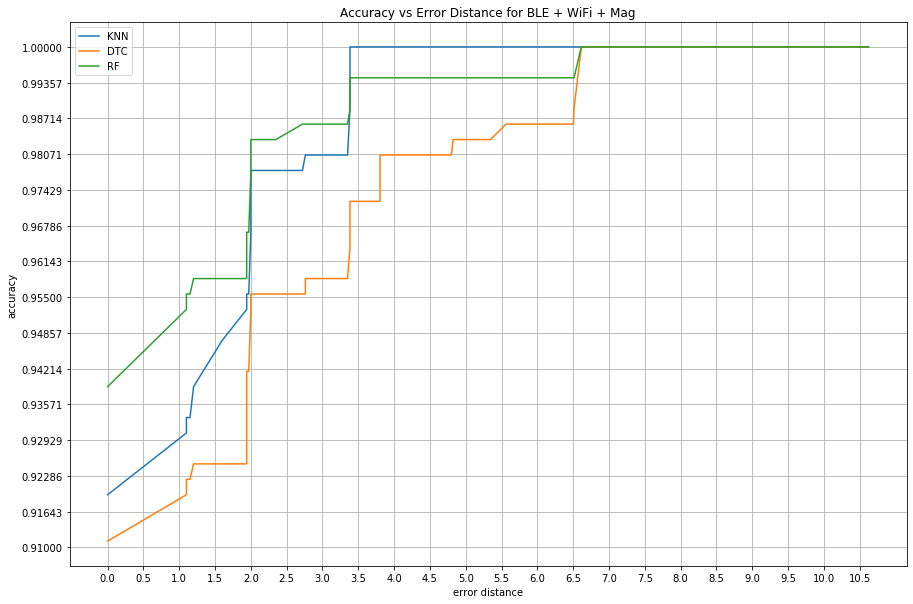

In [339]:
fig= plt.figure(figsize=(15,10))
x=[[],[],[]]
ay=[[],[],[]]
#x[0],ay[0] = distAccPlot(y_test, Pred1)    
#plt.plot(x[0], ay[0],label = 'SVM')
x[0],ay[0] = distAccPlot(y_test, Pred2)    
plt.plot(x[0], ay[0],label = 'KNN')
x[1],ay[1] = distAccPlot(y_test, Pred3)    
plt.plot(x[1], ay[1],label = 'DTC')
x[2],ay[2] = distAccPlot(y_test, Pred4)    
plt.plot(x[2], ay[2],label = 'RF')
plt.xticks(np.arange(0,x[1][-1],0.5))
plt.yticks(np.linspace(min(ay)[0]-min(ay)[0]%0.01,1,num=15,endpoint=True))
plt.xlabel('error distance')
plt.ylabel('accuracy')
plt.title('Accuracy vs Distance for BLE + WiFi + Mag')
plt.grid()
plt.legend()
plt.show()

## Accuracies Bar Chart

In [324]:
accs = np.array(accs)

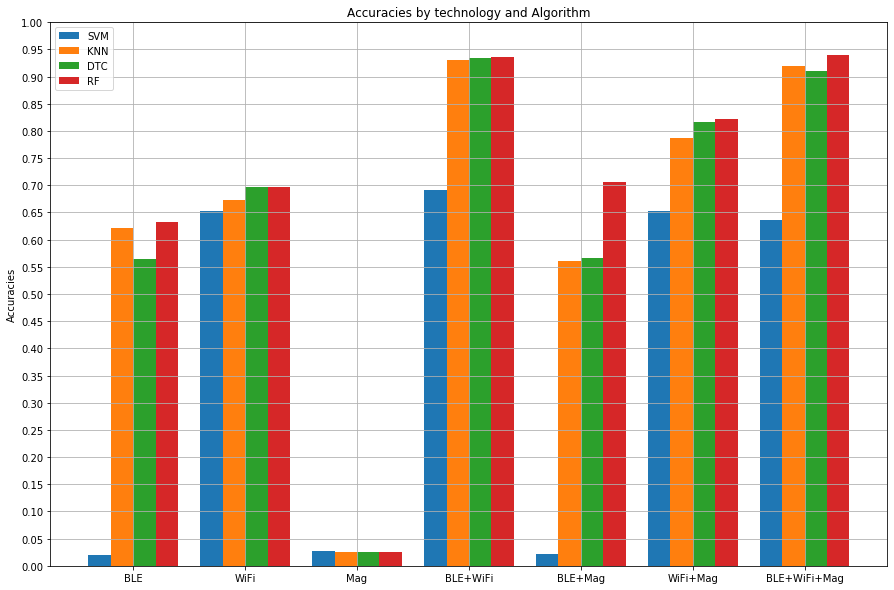

In [325]:
labels = ['BLE', 'WiFi', 'Mag', 'BLE+WiFi', 'BLE+Mag', 'WiFi+Mag','BLE+WiFi+Mag']
x = np.arange(len(labels))
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))

rects1 = ax.bar(x - 3*width/2, accs[:,0], width, label='SVM')
rects2 = ax.bar(x - width/2, accs[:,1], width, label='KNN')
rects3 = ax.bar(x + width/2, accs[:,2], width, label='DTC')
rects4 = ax.bar(x + 3*width/2, accs[:,3], width, label='RF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracies')
ax.set_title('Accuracies by technology and Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.linspace(0,1,num=21,endpoint=True))
ax.grid()
ax.legend()

plt.show()

In [326]:
scrs = np.array(scrs)

## Precisions Bar Charts

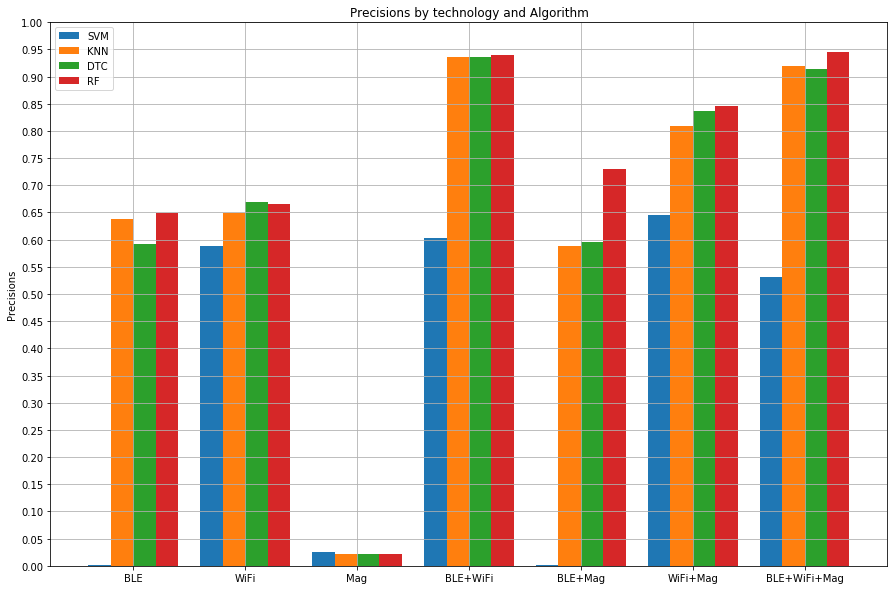

In [327]:
labels = ['BLE', 'WiFi', 'Mag', 'BLE+WiFi', 'BLE+Mag', 'WiFi+Mag','BLE+WiFi+Mag']
x = np.arange(len(labels))
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))

rects1 = ax.bar(x - 3*width/2, scrs[:,0,0], width, label='SVM')
rects2 = ax.bar(x - width/2, scrs[:,1,0], width, label='KNN')
rects3 = ax.bar(x + width/2, scrs[:,2,0], width, label='DTC')
rects4 = ax.bar(x + 3*width/2, scrs[:,3,0], width, label='RF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precisions')
ax.set_title('Precisions by technology and Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.linspace(0,1,num=21,endpoint=True))
ax.grid()
ax.legend()

plt.show()

## Recalls Bar Charts

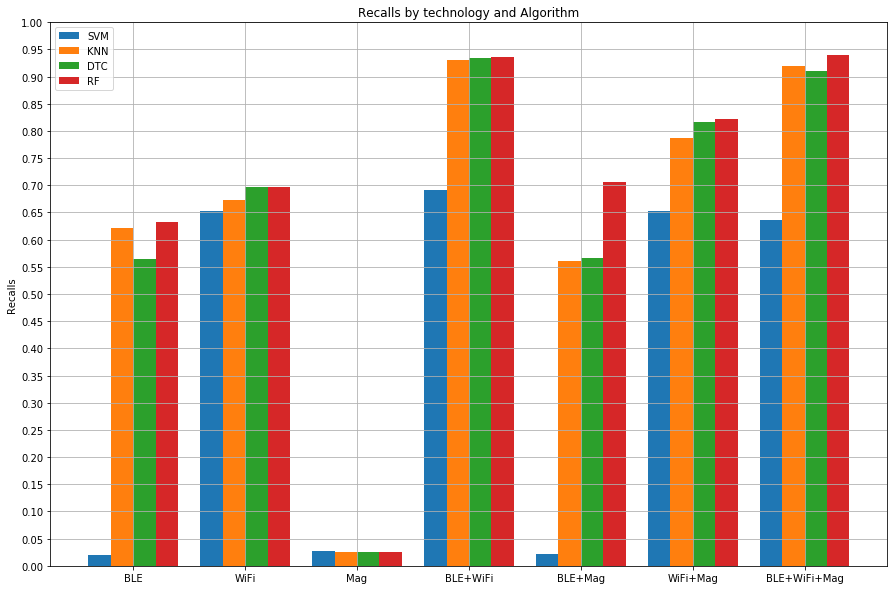

In [328]:
labels = ['BLE', 'WiFi', 'Mag', 'BLE+WiFi', 'BLE+Mag', 'WiFi+Mag','BLE+WiFi+Mag']
x = np.arange(len(labels))
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))

rects1 = ax.bar(x - 3*width/2, scrs[:,0,1], width, label='SVM')
rects2 = ax.bar(x - width/2, scrs[:,1,1], width, label='KNN')
rects3 = ax.bar(x + width/2, scrs[:,2,1], width, label='DTC')
rects4 = ax.bar(x + 3*width/2, scrs[:,3,1], width, label='RF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Recalls')
ax.set_title('Recalls by technology and Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.linspace(0,1,num=21,endpoint=True))
ax.grid()
ax.legend()

plt.show()

## F1 Score Bar Charts

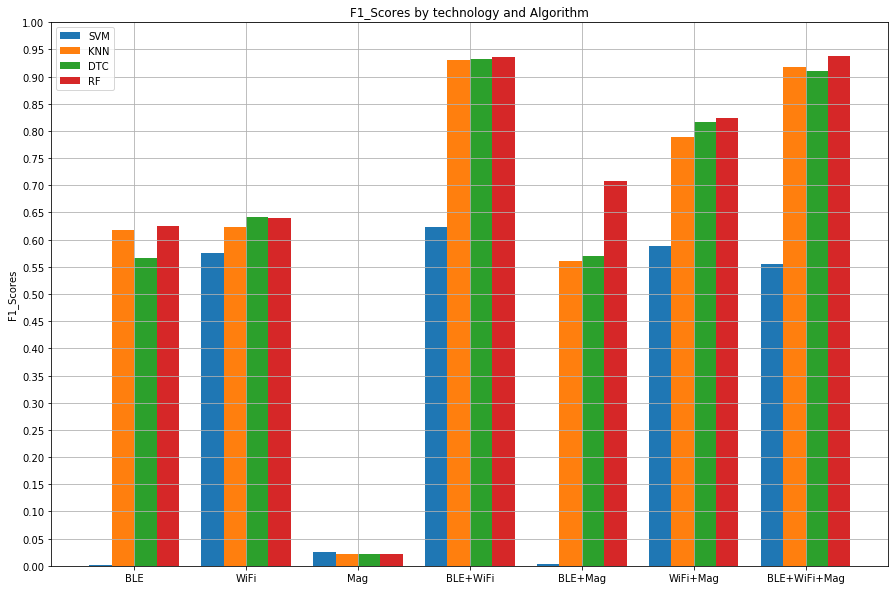

In [329]:
labels = ['BLE', 'WiFi', 'Mag', 'BLE+WiFi', 'BLE+Mag', 'WiFi+Mag','BLE+WiFi+Mag']
x = np.arange(len(labels))
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))

rects1 = ax.bar(x - 3*width/2, scrs[:,0,2], width, label='SVM')
rects2 = ax.bar(x - width/2, scrs[:,1,2], width, label='KNN')
rects3 = ax.bar(x + width/2, scrs[:,2,2], width, label='DTC')
rects4 = ax.bar(x + 3*width/2, scrs[:,3,2], width, label='RF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1_Scores')
ax.set_title('F1_Scores by technology and Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.linspace(0,1,num=21,endpoint=True))
ax.grid()
ax.legend()

plt.show()

In [331]:
accs[:,3]

array([0.63333333, 0.69722222, 0.025     , 0.93611111, 0.70555556,
       0.82222222, 0.93888889])

In [332]:
ay[2]

[0.9388888888888889,
 0.9527777777777777,
 0.9555555555555555,
 0.9555555555555555,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9638888888888888,
 0.9638888888888888,
 0.9638888888888888,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9777777777777776,
 0.9777777777777776,
 0.9833333333333332,
 0.9833333333333332,
 0.9833333333333332,
 0.9833333333333332,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9888888888888887,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444

In [333]:
x[2]

2

In [334]:
distAccPlot(y_test, Pred4)

((0.0,
  1.0999999999999996,
  1.1000000000000005,
  1.1500000000000004,
  1.1999999999999997,
  1.5999999999999996,
  1.5999999999999999,
  1.6,
  1.6000000000000005,
  1.9416487838947594,
  1.9416487838947598,
  1.94164878389476,
  1.9416487838947603,
  1.9416487838947607,
  1.970406049523803,
  1.9704060495238038,
  1.9999999999999996,
  1.9999999999999998,
  2.0,
  2.2,
  2.25,
  2.35,
  2.7202941017470885,
  2.720294101747089,
  2.7608875384557043,
  2.760887538455705,
  2.7608875384557052,
  2.8429737951659,
  2.8429737951659004,
  3.1999999999999997,
  3.2,
  3.200000000000001,
  3.3500000000000005,
  3.383784863137726,
  3.3837848631377265,
  3.383784863137727,
  3.3837848631377274,
  3.4003676271838614,
  3.4003676271838623,
  3.417601498127012,
  3.417601498127013,
  3.4176014981270133,
  3.4499999999999997,
  3.7124789561693143,
  3.712478956169315,
  3.8029593739612833,
  3.8029593739612837,
  3.88329756778952,
  3.883297567789521,
  3.9118409988137297,
  3.91184099881373,


In [336]:
distAccPlot(y_test, Pred4)[1]

[0.9388888888888889,
 0.9527777777777777,
 0.9555555555555555,
 0.9555555555555555,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9638888888888888,
 0.9638888888888888,
 0.9638888888888888,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9777777777777776,
 0.9777777777777776,
 0.9833333333333332,
 0.9833333333333332,
 0.9833333333333332,
 0.9833333333333332,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9861111111111109,
 0.9888888888888887,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444444442,
 0.9944444444

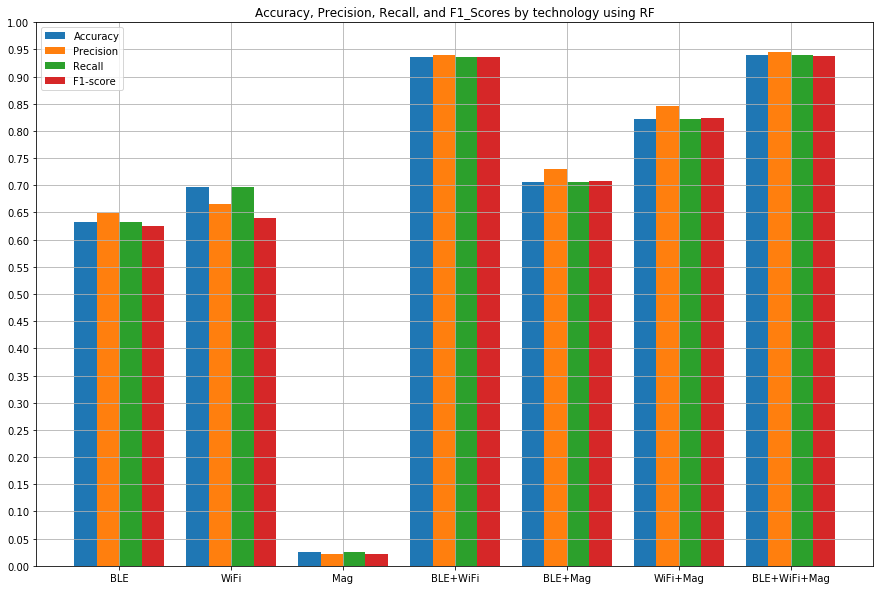

In [338]:
labels = ['BLE', 'WiFi', 'Mag', 'BLE+WiFi', 'BLE+Mag', 'WiFi+Mag','BLE+WiFi+Mag']
x = np.arange(len(labels))
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))

rects1 = ax.bar(x - 3*width/2, accs[:,3], width, label='Accuracy')
rects2 = ax.bar(x - width/2, scrs[:,3,0], width, label='Precision')
rects3 = ax.bar(x + width/2, scrs[:,3,1], width, label='Recall')
rects4 = ax.bar(x + 3*width/2, scrs[:,3,2], width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('F1_Scores')
ax.set_title('Accuracy, Precision, Recall, and F1_Scores by technology using RF')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.linspace(0,1,num=21,endpoint=True))
ax.grid()
ax.legend()

plt.show()